In [1]:
"""Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")"""

'Output variable -> y\ny -> Whether the client has subscribed a term deposit or not \nBinomial ("yes" or "no")'

In [53]:
import pandas as pd
df = pd.read_csv("D:/EXCELR/Practise/bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [54]:
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [55]:
X_Cont = df[["age", "balance", "day","duration", "campaign", "pdays", "previous" ]]
X_Cont = pd.DataFrame(X_Cont)

X_Cat = df[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]]
X_Cat = pd.DataFrame(X_Cat)

Y = df[["y"]]


In [56]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
#Label_Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in X_Cat:
    X_Cat[col] = LE.fit_transform(X_Cat[col])
X_Cat
   

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3
...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3
45207,5,0,0,0,0,0,0,9,3
45208,5,1,1,0,0,0,0,9,2
45209,1,1,1,0,0,0,1,9,3


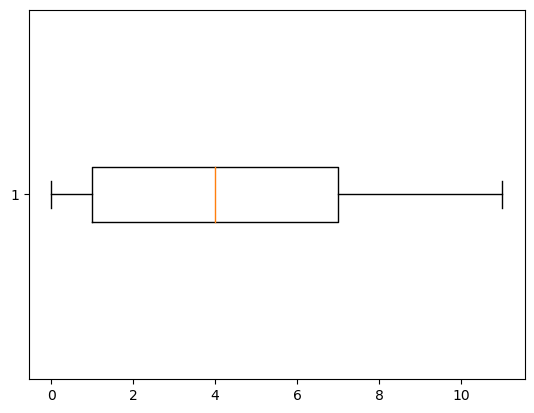

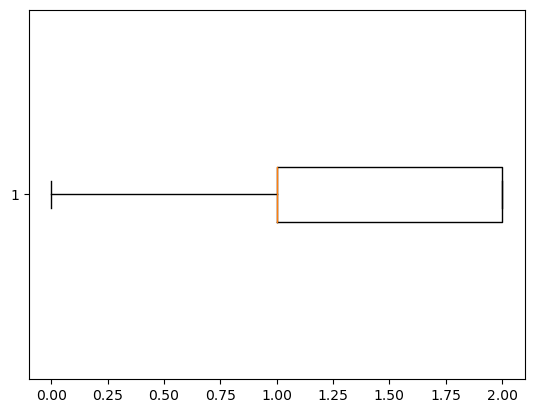

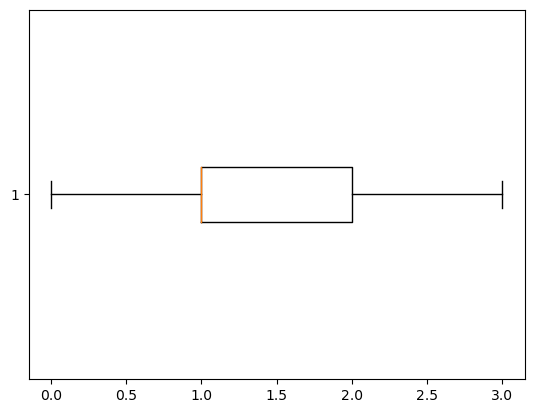

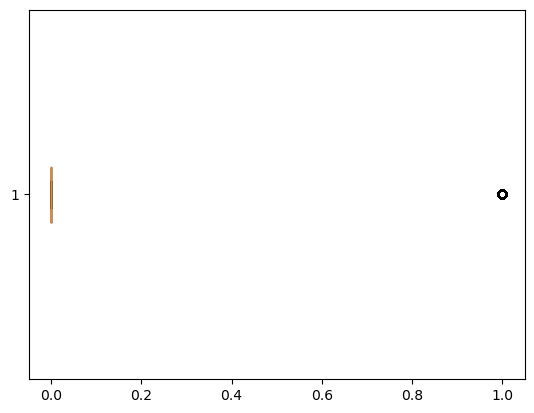

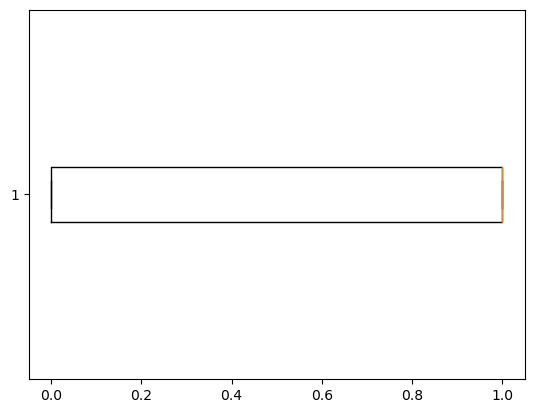

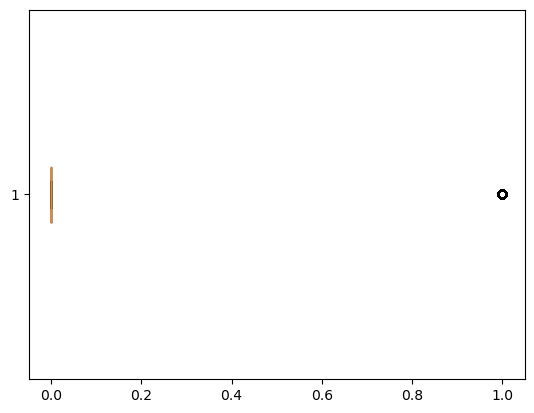

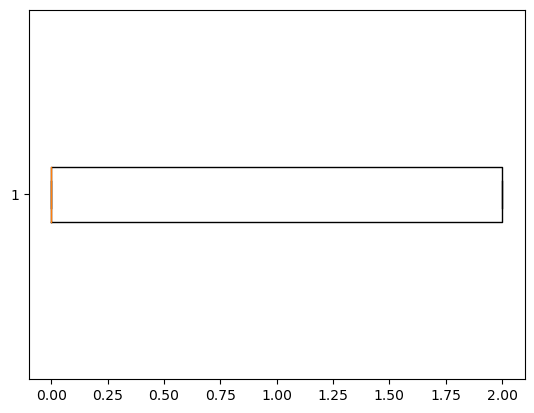

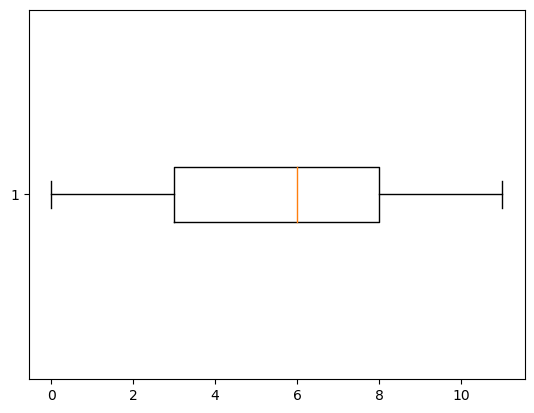

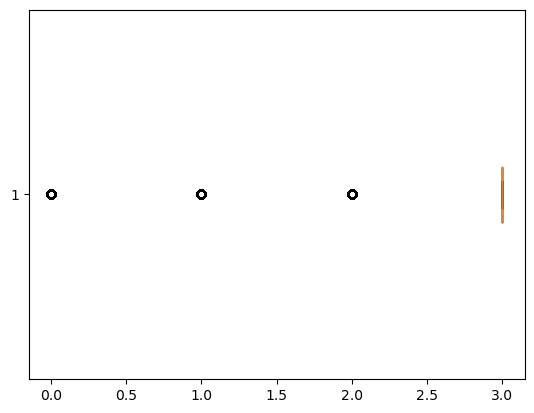

In [57]:
import matplotlib.pyplot as plt

for feature in X_Cat:
    plt.boxplot(X_Cat[[feature]], vert=False)
    plt.show()

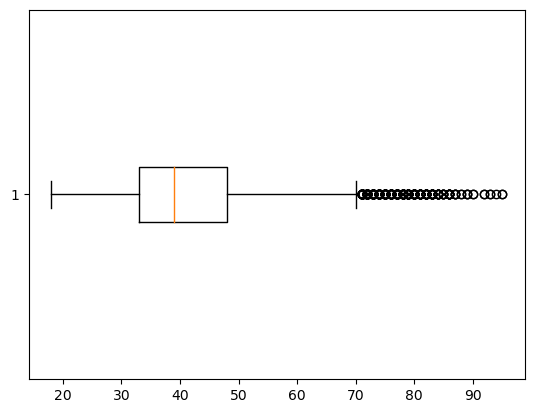

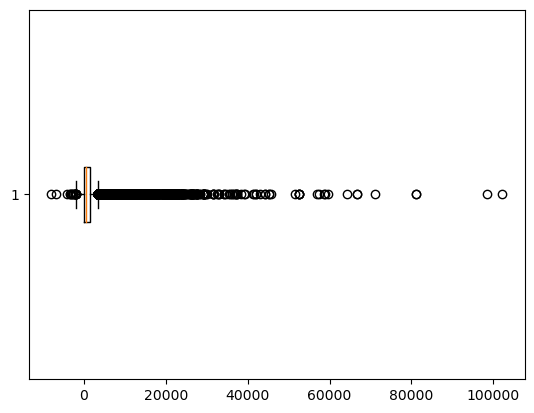

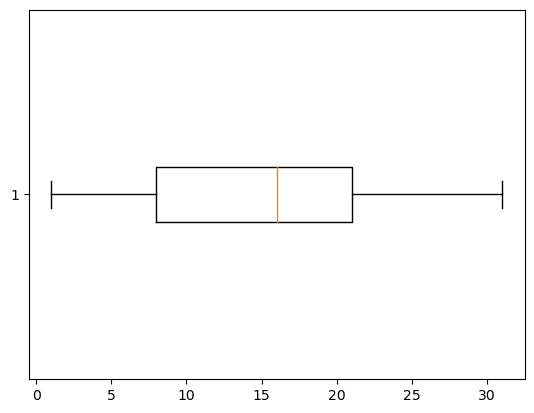

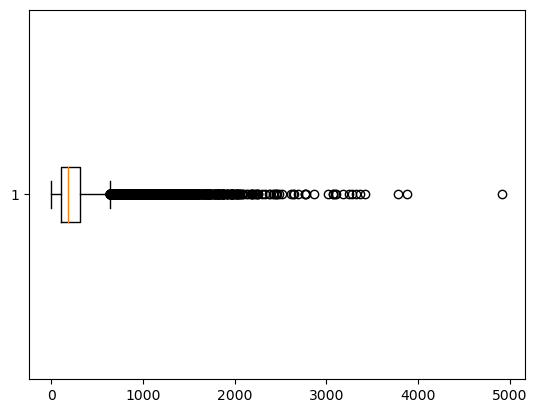

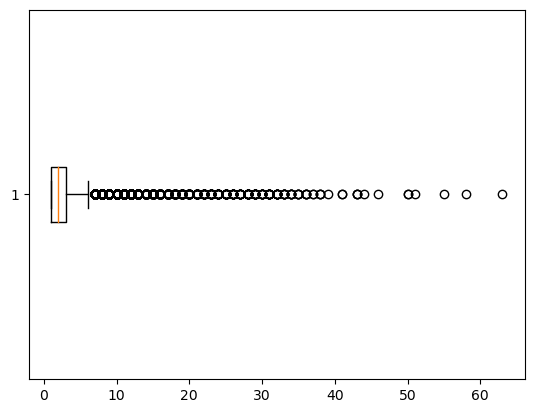

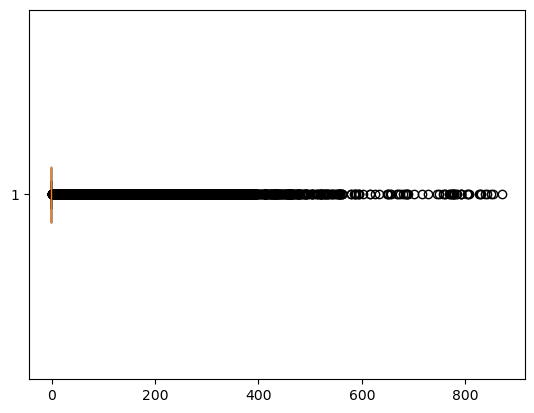

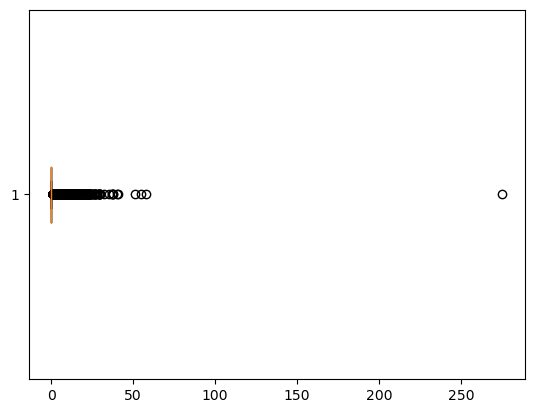

In [58]:
for feature in X_Cont:
    plt.boxplot(X_Cont[[feature]], vert=False)
    plt.show()

In [59]:
#Replacing outliers with median

for column in X_Cont:
    Q1 = np.percentile(X_Cont[column], 25)
    Q3 = np.percentile(X_Cont[column], 75)
    IQR = Q3 - Q1
    UW = Q3 + (1.5 * IQR)
    LW = Q1 - (1.5 * IQR)
    X_Cont[column].copy()[X_Cont[column] > UW] = X_Cont[column].median()
    X_Cont[column].copy()[X_Cont[column] < LW] = X_Cont[column].median()

In [60]:
#Replacing outliers with median

for column in X_Cat:
    Q1 = np.percentile(X_Cat[column], 25)
    Q3 = np.percentile(X_Cat[column], 75)
    IQR = Q3 - Q1
    UW = Q3 + (1.5 * IQR)
    LW = Q1 - (1.5 * IQR)
    X_Cat[column].copy()[X_Cat[column] > UW] = X_Cat[column].median()
    X_Cat[column].copy()[X_Cat[column] < LW] = X_Cat[column].median()

In [61]:
#std Scaler
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_SS = ss.fit_transform(X_Cont)
X_SS = pd.DataFrame(X_SS)
X_SS
X_SS.describe()

,0,1,2,3,4,5,6
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,3.070663e-15,-9.219436e-15,5.560938e-17,1.254699e-14,-1.395817e-13,1.355210e-13
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,2.326031e-02,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,6.240497e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.825628e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02


In [62]:
X_new = pd.concat([X_Cat, X_SS], axis=1, ignore_index=True)
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4,1,2,0,1,0,2,8,3,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,9,2,1,0,1,0,2,8,3,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,2,1,1,0,1,1,2,8,3,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,1,1,3,0,1,0,2,8,3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,11,2,3,0,0,0,2,8,3,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,5,0,0,0,0,0,0,9,3,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,5,1,1,0,0,0,0,9,2,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1,1,1,0,0,0,1,9,3,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


In [63]:
# step5: Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y, test_size=0.3,random_state=(42))

In [64]:
import numpy as np
Y_train = np.ravel(Y_train)

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [66]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(Y_train,y_pred_train)
ac_test = accuracy_score(Y_test,y_pred_test)
print("accuracy Score train = ", ac_train.round(3))
print("accuracy Score test = ", ac_test.round(3))

accuracy Score train =  0.891
accuracy Score test =  0.89
